# Problem Statement

Understanding the problem is the first step.

Loan prediction is a very common real-life problem that each retail bank faces atleast once in its lifetime. If done correctly, it can save a lot of man hours at the end of a retail bank.

Here Customer first apply for loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

# About the variables in data

Variable ----- Description

Loan_ID -->> Unique Loan ID

Gender -->> Male/ Female

Married -->> Applicant married (Y/N)

Dependents -->> Number of dependents

Education -->> Applicant Education (Graduate/ Under Graduate)

Self_Employed -->> Self employed (Y/N)

ApplicantIncome -->> Applicant income

CoapplicantIncome -->> Coapplicant income

LoanAmount -->> Loan amount in thousands

Loan_Amount_Term -->> Term of loan in months

Credit_History -->> credit history meets guidelines

Property_Area -->> Urban/ Semi Urban/ Rural

Loan_Status -->> Loan approved (Y/N)

# Import the required libraries

In [66]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load The Data

In [67]:
loan = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [68]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [69]:
test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [70]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Check the information of the Dataset

In [71]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [72]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


here we can see that there are many types of data.For prediction purpose we only need the numerical type of data.

# Describing the data

In [73]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Checking missing values

In [74]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [75]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

There are missing values in both dataset. For the train dataset, we should transform the missing values into some values, but for the test dataset I choose to drop it instead.

# data train (loan Dataset)

Missing Values of  Gender, Married, Self_Employed
- Filling the missing value using Mode as it is catogorical Data.

In [76]:
loan['Gender'] = loan['Gender'].fillna(loan['Gender'].mode())
loan['Married'] = loan['Married'].fillna(loan['Married'].mode())
loan['Self_Employed'] = loan['Self_Employed'].fillna(loan['Self_Employed'].mode())

Missing Values of LoanAmount
- Filling the missing value using mean

In [77]:
loan['LoanAmount'] = loan['LoanAmount'].fillna(loan['LoanAmount'].mean())

Missing Values of Credit_History
- Filling the missing value using Median

In [78]:
loan['Credit_History'] = loan['Credit_History'].fillna(loan['Credit_History'].median())

As we can see there are Missing values from Dependents and loan_Amount_Term so we can drop them as they are not necessary

In [79]:
loan.dropna(inplace=True)

In [80]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now, The Dataset does not have any missing values

# data Test (Test dataset)

Dropping the missing values

In [81]:
test.dropna(inplace=True)

Drop the the Load_ID 

In [82]:
test.drop('Loan_ID', inplace=True, axis = 1)

In [83]:
loan.drop('Loan_ID', inplace=True, axis= 1)

In [84]:
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Now, we can see there are no missing values

# Object Type data mapping

# Loan data

In [85]:
loan.Gender = loan.Gender.map({'Male':1, 'Female':0})
loan.Married = loan.Married.map({'Yes':1, 'No':0})
loan.Education = loan.Education.map({'Graduate':1, 'Not Graduate':0})
loan.Self_Employed = loan.Self_Employed.map({'Yes':1, 'No':0})
loan.Dependents = loan.Dependents.map({'0':0, '1':1, '2':2, '3+':3})
loan.Property_Area = loan.Property_Area.map({'Urban':1, 'Rural':0, 'Semiurban':2})
loan.Loan_Status = loan.Loan_Status.map({'Y':1, 'N':0})

In [86]:
test.Gender = test.Gender.map({'Male':1, 'Female':0})
test.Married = test.Married.map({'Yes':1, 'No':0})
test.Education = test.Education.map({'Graduate':1, 'Not Graduate':0})
test.Self_Employed = test.Self_Employed.map({'Yes':1, 'No':0})
test.Dependents = test.Dependents.map({'0':0, '1':1, '2':2, '3+':3})
test.Property_Area = test.Property_Area.map({'Urban':1, 'Rural':0, 'Semiurban':2})

In [87]:
loan.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [88]:
test.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
dtype: object

# Data Visualization

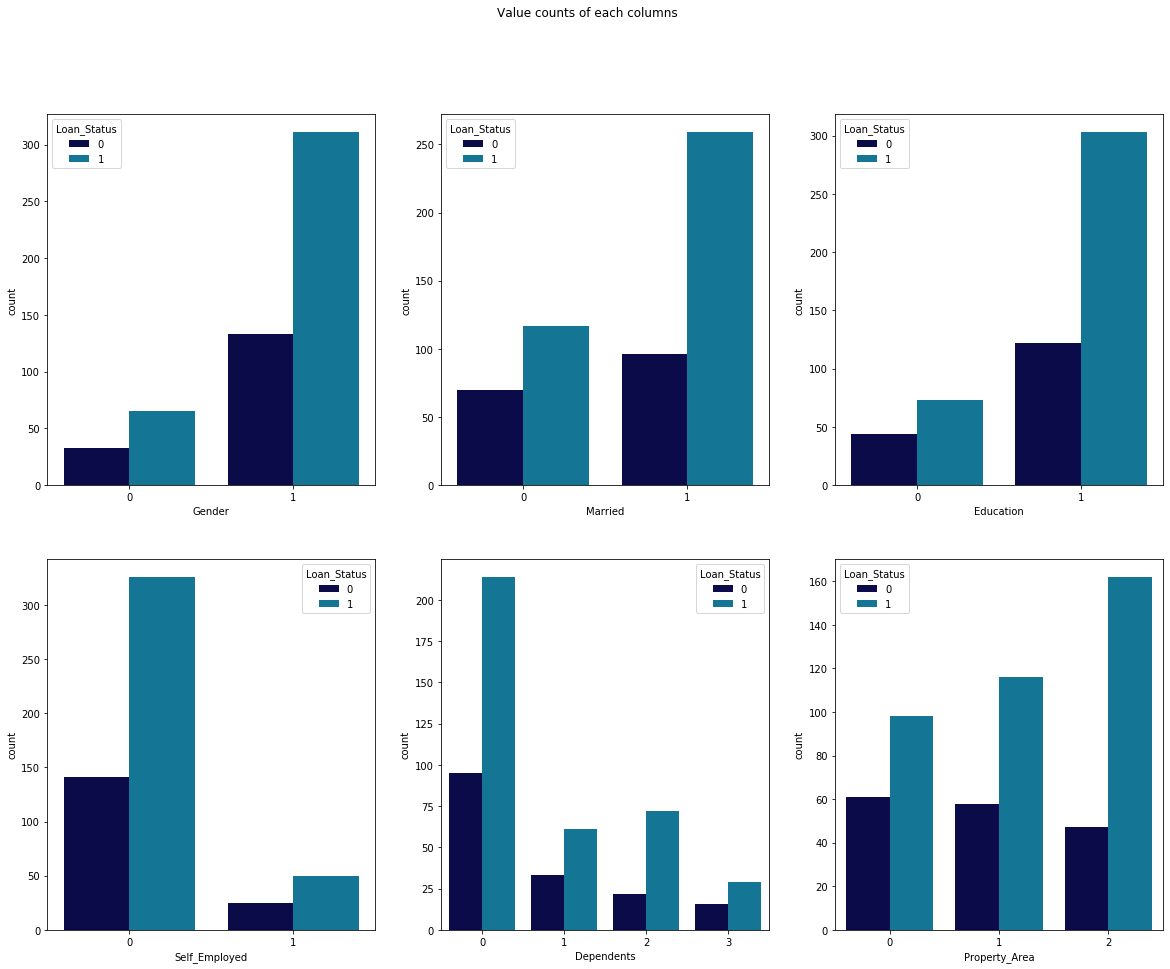

In [89]:
fig, axes = plt.subplots(2, 3, figsize=(20,15))

fig.suptitle('Value counts of each columns')

sns.countplot(loan['Gender'], hue = loan['Loan_Status'], ax=axes[0, 0], palette='ocean')
sns.countplot(loan['Married'], hue = loan['Loan_Status'], ax=axes[0, 1], palette='ocean')
sns.countplot(loan['Education'], hue = loan['Loan_Status'], ax=axes[0, 2], palette='ocean')
sns.countplot(loan['Self_Employed'], hue = loan['Loan_Status'], ax=axes[1, 0], palette='ocean')
sns.countplot(loan['Dependents'], hue = loan['Loan_Status'], ax=axes[1, 1], palette='ocean')
sns.countplot(loan['Property_Area'], hue = loan['Loan_Status'], ax=axes[1, 2], palette='ocean')

Univariate Analysis

- For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable.

- For numerical features, probability density plots can be used to look at the distribution of the variable.

Target Variable

Here the target variable  is Loan_Status. 

Frequency table tell us the count of each category in that variable

In [90]:
loan["Loan_Status"].count()

542

size of target variable is 542

In [91]:
loan["Loan_Status"].value_counts()

1    376
0    166
Name: Loan_Status, dtype: int64

Accepted : 376 Rejected : 166

In [92]:
loan["Loan_Status"].value_counts(normalize=True)*100

1    69.372694
0    30.627306
Name: Loan_Status, dtype: float64

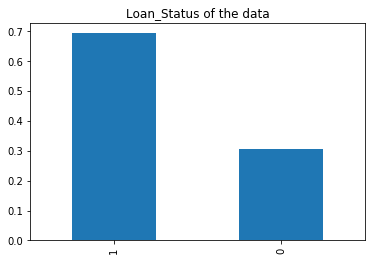

In [93]:
loan["Loan_Status"].value_counts(normalize=True).plot.bar(title = 'Loan_Status of the data')

Here the loan of 376 means 69% members out of 542 was accepted and the loan of 166 means 31% members out of 542 was rejected

let us examine different types of variable such as Categorical, ordinal and numerical



# lets us analysis on "Married" varible:

In [94]:
loan['Married'].count()

542

here the size of the Married varible is of 542

In [95]:
loan['Married'].value_counts()

1    355
0    187
Name: Married, dtype: int64

So, there are 355  people who are Married and 187 people who are unmarried 

In [96]:
loan['Married'].value_counts(normalize=True)*100

1    65.498155
0    34.501845
Name: Married, dtype: float64

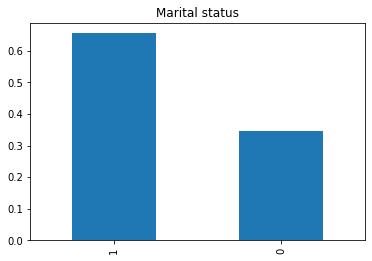

In [97]:
loan['Married'].value_counts(normalize=True).plot.bar(title= 'Marital status')

Here, out of 542 people 
- no of married people are 65%
- no of unmarried people are 35%

# lets us analysis on "Self_Employed" variable:

In [98]:
loan["Self_Employed"].count()

542

here the size of the self_Employed varible is of 542

In [99]:
loan["Self_Employed"].value_counts()

0    467
1     75
Name: Self_Employed, dtype: int64

There are 467 un_employed people and 75 are self_employed

In [100]:
loan['Self_Employed'].value_counts(normalize=True)*100

0    86.162362
1    13.837638
Name: Self_Employed, dtype: float64

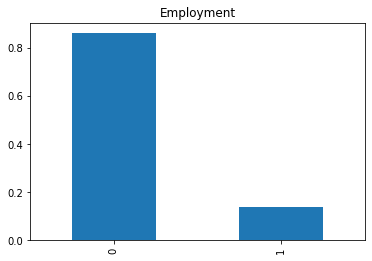

In [101]:
loan['Self_Employed'].value_counts(normalize=True).plot.bar(title='Employment')

Among 542 people only 14% are Self_Employed and rest of the 86% are Not_Self_Employed

# lets us analysis on "Credit_History" variable:

In [102]:
loan["Credit_History"].count()

542

here the size of the Credit_history variable is of 542

In [103]:
loan["Credit_History"].value_counts()

1.0    468
0.0     74
Name: Credit_History, dtype: int64

In [104]:
loan['Credit_History'].value_counts(normalize=True)*100

1.0    86.346863
0.0    13.653137
Name: Credit_History, dtype: float64

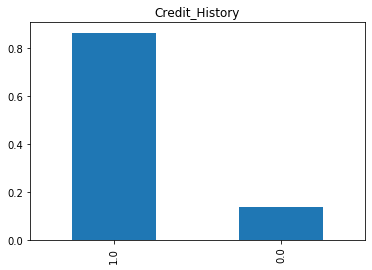

In [105]:
loan['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

Here around 85% people have repaid their debts

Lets Analysis for Ordinal Features they are Dependents, Education, Property_Area

# lets us analysis on "Dependents" variable:

In [106]:
loan['Dependents'].count()

542

here the size of the Dependents variable is of 542

In [107]:
loan["Dependents"].value_counts()

0    309
2     94
1     94
3     45
Name: Dependents, dtype: int64

In [108]:
loan['Dependents'].value_counts(normalize=True)*100

0    57.011070
2    17.343173
1    17.343173
3     8.302583
Name: Dependents, dtype: float64

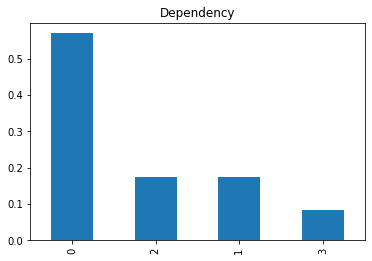

In [109]:
loan['Dependents'].value_counts(normalize=True).plot.bar(title="Dependency")

Here out of 542 people 
- 57% people have 0 dependent 
- 17% people have 1 dependent
- 17% people have 2 dependent
- 8% people have 3 dependent

# lets us analysis on "Education" variable:

In [110]:
loan["Education"].count()

542

here the size of the Education variable is of 542

In [111]:
loan["Education"].value_counts()

1    425
0    117
Name: Education, dtype: int64

In [112]:
loan["Education"].value_counts(normalize=True)*100

1    78.413284
0    21.586716
Name: Education, dtype: float64

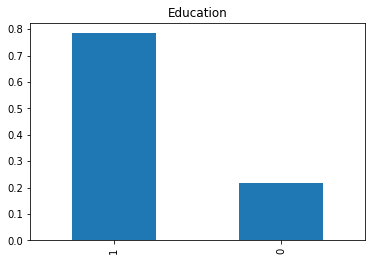

In [113]:
loan["Education"].value_counts(normalize=True).plot.bar(title = "Education")

Total number of People : 614

78% are Graduated and 22% are not Graduated

# lets us analysis on"Property_Area" variable:


In [114]:
loan["Property_Area"].count()

542

here the size of the Property_Area variable is of 542

In [115]:
loan["Property_Area"].value_counts()

2    209
1    174
0    159
Name: Property_Area, dtype: int64

In [116]:
loan["Property_Area"].value_counts(normalize=True)*100

2    38.560886
1    32.103321
0    29.335793
Name: Property_Area, dtype: float64

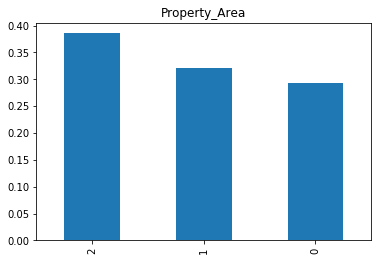

In [117]:
loan["Property_Area"].value_counts(normalize=True).plot.bar(title="Property_Area")

 here out of 542 people
38% people from Semiurban area

33% people from Urban area

29% people from Rural area

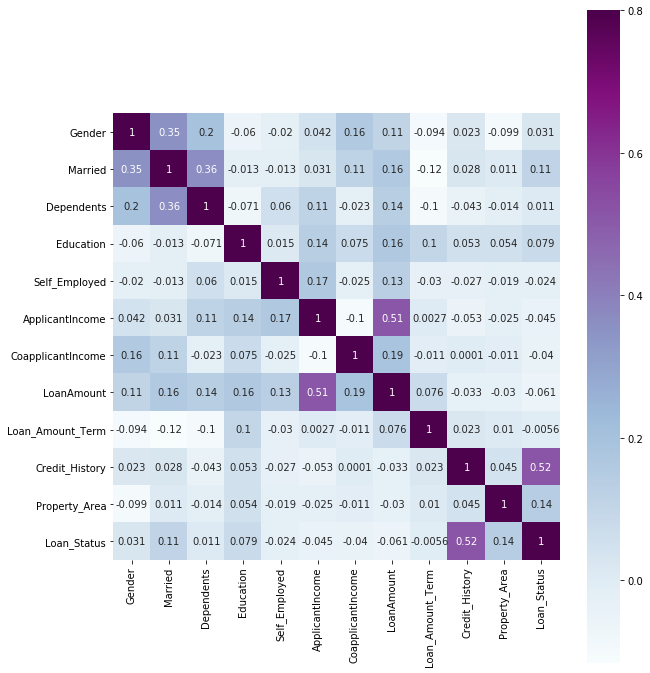

In [118]:
matrix = loan.corr()
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu",annot=True);

# Feature Engineering

Here we we create three new feature as per the domain.
- Total Income
- EMI
- Balance Income

# TotalIncome for train data

In [119]:
loan["TotalIncome"]=loan["ApplicantIncome"]+loan["CoapplicantIncome"]

In [120]:
loan[["TotalIncome"]].head()

,TotalIncome
0,5849.0
1,6091.0
2,3000.0
3,4941.0
4,6000.0


# TotalIncome for test data

In [121]:
test["TotalIncome"]=test["ApplicantIncome"]+test["CoapplicantIncome"]

In [122]:
test[["TotalIncome"]].head()

,TotalIncome
0,5720
1,4576
2,6800
4,3276
5,5587


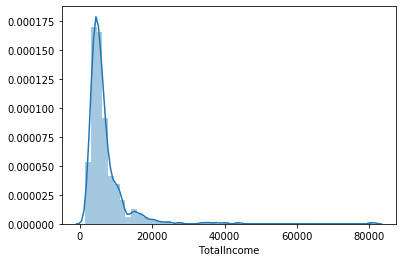

In [123]:
sns.distplot(loan["TotalIncome"])

Here the distribution is right skewed  

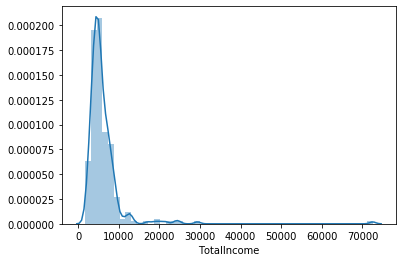

In [125]:
sns.distplot(test["TotalIncome"])

Here the distribution is right skewed 

Now lets create the EMI feature

In [127]:
loan["EMI"]=loan["LoanAmount"]/loan["Loan_Amount_Term"]
test["EMI"]=test["LoanAmount"]/test["Loan_Amount_Term"]

In [128]:
loan[["EMI"]].head()

,EMI
0,0.406700
1,0.355556
2,0.183333
3,0.333333
4,0.391667


In [129]:
test[["EMI"]].head()

,EMI
0,0.305556
1,0.350000
2,0.577778
4,0.216667
5,0.422222


# Check the Distribution

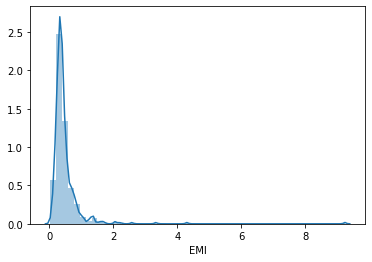

In [130]:
sns.distplot(loan["EMI"])

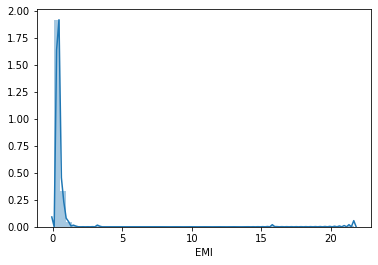

In [131]:
sns.distplot(test["EMI"])

Let's create a new feature called Income Balance

In [134]:
loan["Income_Balance"] = loan["TotalIncome"]-loan["EMI"]*1000 
test["Income_Balance"] = test["TotalIncome"]-test["EMI"]

In [136]:
loan[["Income_Balance"]].head()

,Income_Balance
0,5442.299550
1,5735.444444
2,2816.666667
3,4607.666667
4,5608.333333


In [137]:
test[["Income_Balance"]].head()

,Income_Balance
0,5719.694444
1,4575.650000
2,6799.422222
4,3275.783333
5,5586.577778


Dropping the variables which was used to create these new features because there is correlation between thoes old features and these new features which is very high which should not be high as per the logistic regression assumations. 

In [138]:
loan=loan.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

In [139]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log,EMI,Balance_Income,Income_Balance
0,1,0,0,1,0,1.0,1,1,5849.0,8.674026,0.406700,5442.299550,5442.299550
1,1,1,1,1,0,1.0,0,0,6091.0,8.714568,0.355556,5735.444444,5735.444444
2,1,1,0,1,1,1.0,1,1,3000.0,8.006368,0.183333,2816.666667,2816.666667
3,1,1,0,0,0,1.0,1,1,4941.0,8.505323,0.333333,4607.666667,4607.666667
4,1,0,0,1,0,1.0,1,1,6000.0,8.699515,0.391667,5608.333333,5608.333333


In [140]:
test = test.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

In [141]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,TotalIncome,TotalIncome_log,EMI,Balance_Income,Income_Balance
0,1,1,0,1,0,1.0,1,5720,8.674026,0.305556,5719.694444,5719.694444
1,1,1,1,1,0,1.0,1,4576,8.714568,0.350000,4575.650000,4575.650000
2,1,1,2,1,0,1.0,1,6800,8.006368,0.577778,6799.422222,6799.422222
4,1,0,0,0,0,1.0,1,3276,8.699515,0.216667,3275.783333,3275.783333
5,1,1,0,0,1,1.0,1,5587,9.170872,0.422222,5586.577778,5586.577778


# Model Building:

After creating new features, we can continue the model building process. So we will start with logistic regression model and Decesion Tree

In [143]:
X=loan.drop("Loan_Status",1)

In [144]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,TotalIncome,TotalIncome_log,EMI,Balance_Income,Income_Balance
0,1,0,0,1,0,1.0,1,5849.0,8.674026,0.406700,5442.299550,5442.299550
1,1,1,1,1,0,1.0,0,6091.0,8.714568,0.355556,5735.444444,5735.444444
2,1,1,0,1,1,1.0,1,3000.0,8.006368,0.183333,2816.666667,2816.666667
3,1,1,0,0,0,1.0,1,4941.0,8.505323,0.333333,4607.666667,4607.666667
4,1,0,0,1,0,1.0,1,6000.0,8.699515,0.391667,5608.333333,5608.333333


In [145]:
y=loan[["Loan_Status"]]

In [146]:
y.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


# Creating Dummy Variable

In [149]:
X = pd.get_dummies(X)

In [150]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,TotalIncome,TotalIncome_log,EMI,Balance_Income,Income_Balance
0,1,0,0,1,0,1.0,1,5849.0,8.674026,0.406700,5442.299550,5442.299550
1,1,1,1,1,0,1.0,0,6091.0,8.714568,0.355556,5735.444444,5735.444444
2,1,1,0,1,1,1.0,1,3000.0,8.006368,0.183333,2816.666667,2816.666667
3,1,1,0,0,0,1.0,1,4941.0,8.505323,0.333333,4607.666667,4607.666667
4,1,0,0,1,0,1.0,1,6000.0,8.699515,0.391667,5608.333333,5608.333333


In [151]:
train=pd.get_dummies(loan)
test=pd.get_dummies(test)

In [152]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log,EMI,Balance_Income,Income_Balance
0,1,0,0,1,0,1.0,1,1,5849.0,8.674026,0.406700,5442.299550,5442.299550
1,1,1,1,1,0,1.0,0,0,6091.0,8.714568,0.355556,5735.444444,5735.444444
2,1,1,0,1,1,1.0,1,1,3000.0,8.006368,0.183333,2816.666667,2816.666667
3,1,1,0,0,0,1.0,1,1,4941.0,8.505323,0.333333,4607.666667,4607.666667
4,1,0,0,1,0,1.0,1,1,6000.0,8.699515,0.391667,5608.333333,5608.333333


In [153]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,TotalIncome,TotalIncome_log,EMI,Balance_Income,Income_Balance
0,1,1,0,1,0,1.0,1,5720,8.674026,0.305556,5719.694444,5719.694444
1,1,1,1,1,0,1.0,1,4576,8.714568,0.350000,4575.650000,4575.650000
2,1,1,2,1,0,1.0,1,6800,8.006368,0.577778,6799.422222,6799.422222
4,1,0,0,0,0,1.0,1,3276,8.699515,0.216667,3275.783333,3275.783333
5,1,1,0,0,1,1.0,1,5587,9.170872,0.422222,5586.577778,5586.577778


let's us divide the Dataset into train and test data using function train_test_split.

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3,random_state=1)

The dataset has been divided into training and validation part.

70% data will use for train the model and rest of the 30% data will use for checking validation of the model.

# Logistic Regression

Importing LogisticRegression and accuracy_score from sklearn and fitting the data

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [157]:
logistic_model = LogisticRegression(random_state=1)

In [158]:
logistic_model.fit(x_train,y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=1)

Prediction of Loan_Status for validation set

In [159]:
pred_cv_logistic=logistic_model.predict(x_cv)

In [160]:
score_logistic =accuracy_score(pred_cv_logistic,y_cv)*100 

# Checking for accuracy score

In [161]:
score_logistic

71.16564417177914

So here are model gives 71% accuracy which means we have identified 71% of the loan status rightly.

# Decision Tree Classifier

Importing Decision Tree Classifier and accuracy_score from sklearn and fitting the data

In [162]:
from sklearn.tree import DecisionTreeClassifier

In [163]:
tree_model = DecisionTreeClassifier(random_state=1)

In [164]:
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [165]:
pred_cv_tree=tree_model.predict(x_cv)

In [166]:
score_tree =accuracy_score(pred_cv_tree,y_cv)*100 

In [167]:
score_tree

68.09815950920245

So here are model gives 68% accuracy which means we have identified 68% of the loan status rightly.

# Conclusion

Here we can say that LogisticRegression gives more accuracy or prediction then Decision Tree Classifier